In [7]:
import re
import operator

word_counts = {}
file = open('romeoandjuliet.txt', 'r')
text = file.read().lower()
match = re.findall(r'\b[a-z\'\-]{1,100}\b', text)
for word in match:
    count = word_counts.get(word,0)
    word_counts[word] = count + 1

sorted_counts = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)

# Check counts
for word, count in sorted_counts:
    print(word + ': ' + str(count))

and: 713
the: 680
i: 585
to: 541
a: 468
of: 401
my: 360
that: 347
is: 344
in: 319
you: 291
thou: 277
me: 265
not: 260
with: 255
it: 228
this: 226
for: 224
be: 215
but: 183
what: 165
thy: 164
rom: 163
her: 156
as: 155
o: 154
nurse: 150
will: 149
so: 147
his: 139
thee: 138
romeo: 137
love: 137
have: 126
he: 118
jul: 117
she: 114
shall: 110
by: 109
no: 102
your: 102
him: 100
all: 98
come: 98
friar: 92
do: 89
an: 86
from: 86
then: 84
if: 83
enter: 82
good: 82
here: 80
now: 79
on: 77
go: 76
man: 72
i'll: 72
or: 71
at: 70
death: 69
lady: 68
night: 68
more: 67
we: 66
are: 66
ben: 64
hath: 64
there: 64
which: 63
mer: 62
our: 61
one: 61
am: 60
how: 60
juliet: 59
they: 59
well: 59
too: 57
some: 57
sir: 56
would: 56
tybalt: 55
art: 55
up: 55
when: 53
cap: 53
where: 52
out: 52
say: 52
should: 49
was: 49
dead: 49
wife: 47
their: 47
doth: 47
give: 47
may: 47
yet: 47
than: 47
such: 46
let: 45
day: 45
tell: 45
fair: 44
them: 44
upon: 44
these: 42
take: 41
tis: 41
must: 40
did: 40
can: 40
make: 40
like

paper: 3
another's: 3
backward: 3
food: 3
ask'd: 3
cup: 3
compare: 3
seems: 3
year: 3
forbid: 3
daughter's: 3
susan: 3
dug: 3
brain: 3
taste: 3
bitter: 3
twas: 3
jule: 3
wretch: 3
choose: 3
e'er: 3
lends: 3
content: 3
call'd: 3
date: 3
cupid: 3
burthen: 3
visor: 3
blush: 3
mouse: 3
burn: 3
delay: 3
vain: 3
meaning: 3
dreamt: 3
mab: 3
small: 3
knees: 3
substance: 3
inconstant: 3
wind: 3
clos'd: 3
sail: 3
save: 3
loves: 3
grown: 3
solemnity: 3
virtuous: 3
chance: 3
contrary: 3
hearts: 3
withdraw: 3
seeming: 3
touch: 3
saints: 3
craves: 3
talk'd: 3
door: 3
passion: 3
appear: 3
likeness: 3
pronounce: 3
shot: 3
hid: 3
wound: 3
arise: 3
knew: 3
business: 3
gaze: 3
drunk: 3
hundred: 3
walls: 3
wash'd: 3
dwell: 3
mayst: 3
fond: 3
confess: 3
cease: 3
exchange: 3
faithful: 3
purpose: 3
worse: 3
toward: 3
almost: 3
morn: 3
day's: 3
turns: 3
keeps: 3
lo: 3
confession: 3
truly: 3
jesu: 3
chang'd: 3
pure: 3
devil: 3
immortal: 3
courtesy: 3
courteous: 3
faint: 3
whole: 3
wide: 3
wouldst: 3
bawd: 3
sp

assembly: 1
asking: 1
crush: 1
wine: 1
sups: 1
lov'st: 1
admired: 1
unattainted: 1
swan: 1
devout: 1
religion: 1
maintains: 1
falsehood: 1
fires: 1
drown'd: 1
transparent: 1
heretics: 1
liars: 1
all-seeing: 1
begun: 1
pois'd: 1
crystal: 1
scales: 1
weigh'd: 1
shining: 1
scant: 1
splendour: 1
bade: 1
ladybird: 1
rememb'red: 1
thou's: 1
teeth: 1
teen: 1
spoken: 1
lammastide: 1
fortnight: 1
christian: 1
earthquake: 1
wean'd: 1
nipple: 1
tetchy: 1
high-lone: 1
rood: 1
waddled: 1
holidam: 1
yeas: 1
bump: 1
cock'rel's: 1
perilous: 1
cried: 1
fall'st: 1
comest: 1
stint: 1
babe: 1
theme: 1
teat: 1
esteem: 1
seeks: 1
pen: 1
lineament: 1
obscur'd: 1
margent: 1
unbound: 1
beautify: 1
lacks: 1
many's: 1
glory: 1
clasps: 1
possess: 1
briefly: 1
looking: 1
liking: 1
endart: 1
curs'd: 1
pantry: 1
everything: 1
extremity: 1
wait: 1
nights: 1
six: 1
speech: 1
apology: 1
prolixity: 1
hoodwink'd: 1
scarf: 1
bearing: 1
tartar's: 1
painted: 1
lath: 1
scaring: 1
crowkeeper: 1
without-book: 1
faintly: 1
prom

resign: 1
dear-lov'd: 1
dearer: 1
dreadful: 1
trumpet: 1
serpent: 1
flow'ring: 1
dragon: 1
beautiful: 1
angelical: 1
dove-feather'd: 1
raven: 1
wolvish-ravening: 1
divinest: 1
opposite: 1
justly: 1
seem'st: 1
bower: 1
containing: 1
deceit: 1
gorgeous: 1
honesty: 1
perjur'd: 1
dissemblers: 1
aqua: 1
vitae: 1
blister'd: 1
asham'd: 1
crown'd: 1
monarch: 1
universal: 1
three-hours: 1
tributary: 1
drops: 1
belong: 1
mistaking: 1
memory: 1
deeds: 1
sinners: 1
minds: 1
tybalts: 1
fellowship: 1
needly: 1
rank'd: 1
followed: 1
modern: 1
mov'd: 1
rearward: 1
following: 1
limit: 1
word's: 1
wailing: 1
wounds: 1
theirs: 1
ropes: 1
exil'd: 1
highway: 1
maiden-widowed: 1
wot: 1
affliction: 1
enanmour'd: 1
calamity: 1
acquaintance: 1
familiar: 1
gentler: 1
vanish'd: 1
purgatory: 1
misterm'd: 1
calling: 1
cut'st: 1
axe: 1
smilest: 1
stroke: 1
unthankfulness: 1
rush'd: 1
turn'd: 1
validity: 1
courtship: 1
seize: 1
blessing: 1
thinking: 1
sayest: 1
mix'd: 1
sharp-ground: 1
howling: 1
attends: 1
divine: 

In [2]:
# For plotting purposes only
words, counts = zip(*sorted_counts)
word_order = []
for i in range(len(words)):
    word_order.append(i)

# Get ranks
count_dict = {}   # count:words with that count (rank is occurrence in sorted count_dictionary)
for pair in sorted_counts:
    word = pair[0]
    count = pair[1]
    if count not in count_dict.keys():
        count_dict[count] = [word]
    elif count in count_dict.keys():
        count_dict[count].append(word)

In [3]:
import matplotlib.pylab as plt

num_words = 20   # plot first <num_words> words
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(num_words)

plt.bar(word_order[:num_words], counts[:num_words])
plt.xticks(word_order[:num_words], words[:num_words])
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Frequency of Words in Shakespeare\'s Romeo & Juliet')
plt.show()

<Figure size 2000x1000 with 1 Axes>

In [4]:
from IPython.display import display, Markdown
display(Markdown("#### What are the ten most frequent words (and their counts)?"))
display(Markdown("1. and: 686"))
display(Markdown("2. the: 677"))
display(Markdown("3. i: 549"))
display(Markdown("4. to: 532"))
display(Markdown("5. a: 460"))
display(Markdown("6. of: 399"))
display(Markdown("7. my: 359"))
display(Markdown("8. is: 332"))
display(Markdown("9. that: 327"))
display(Markdown("10. in: 309"))
display(Markdown("#### What are the ten least frequent words?"))
display(Markdown("There are ___ words that have a count of 1, ___ that have a count of 2, ___ for 3, ___ 4, ___ 5, ___ 6, ___ 7, ___ 8, ___ 9, ___ 10."))

#### What are the ten most frequent words (and their counts)?

1. and: 686

2. the: 677

3. i: 549

4. to: 532

5. a: 460

6. of: 399

7. my: 359

8. is: 332

9. that: 327

10. in: 309

#### What are the ten least frequent words?

There are ___ words that have a count of 1, ___ that have a count of 2, ___ for 3, ___ 4, ___ 5, ___ 6, ___ 7, ___ 8, ___ 9, ___ 10.

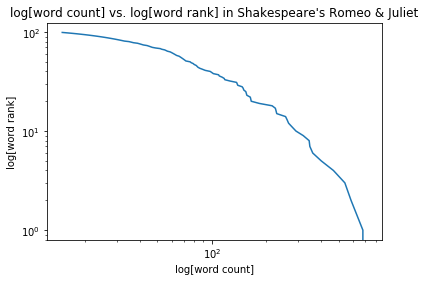

In [5]:
# Bonus: log(word count) vs. log(rank of word)

num_words = 100   # plot first <num_words> words
# count_dict contains <count:words with that count> (rank is index+1 in sorted count_dictionary)
counts = list(count_dict.keys())
ranks = []
for i in range(len(count_dict)):
    ranks.append(i)

plt.loglog(counts[:num_words], ranks[:num_words])
plt.xlabel('log[word count]')
plt.ylabel('log[word rank]')
plt.title('log[word count] vs. log[word rank] in Shakespeare\'s Romeo & Juliet')
plt.show()